### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### 1. Import the necessary packages - 2.5 marks

In [2]:
#your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
pd.set_option("display.precision", 3)

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
#your code here
ratings = pd.read_csv('data.csv')
users = pd.read_csv('user.csv')
movies = pd.read_csv('item.csv')

### 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations - 2.5 marks
 - Note that you will need to do it for all the three datasets seperately

In [4]:
#your code here
print('--------------Rating DF ----------------------')
print(ratings.info())
print(ratings.describe())
print('Number of missing values in ratings %d' % ratings.isnull().sum()[0])
print('Number of rows : %d and number of columns : %d' % ratings.shape)
print()
print('--------------User DF ----------------------')
print(users.info())
print(users.describe())
print('Number of missing values in users %d' % users.isnull().sum()[0])
print('Number of rows : %d and number of columns : %d' % users.shape)
print()
print('--------------Movies DF ----------------------')
print(movies.info())
print(movies.describe())
print('Number of missing values in movies %d' % movies.isnull().sum()[0])
print('Number of rows : %d and number of columns : %d' % movies.shape)

--------------Rating DF ----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None
          user id    movie id      rating  timestamp
count  100000.000  100000.000  100000.000  1.000e+05
mean      462.485     425.530       3.530  8.835e+08
std       266.614     330.798       1.126  5.344e+06
min         1.000       1.000       1.000  8.747e+08
25%       254.000     175.000       3.000  8.794e+08
50%       447.000     322.000       4.000  8.828e+08
75%       682.000     631.000       4.000  8.883e+08
max       943.000    1682.000       5.000  8.933e+08
Number of missing values in ratings 0
Number of rows : 100000 and number of columns : 4

-

**Observations:**
- There is no missing values in item data
- There is no missing value in rating data
- There is no missing value in user data
- There are 100000 ratings in total
- There are 943 users
- There are 1681 movies


### 4. Find the number of movies per genre using the item data - 2.5 marks

In [5]:
movies = movies.drop_duplicates()
movies_genres = movies.drop(columns=['movie id','release date'])
movies_genres.set_index('movie title', inplace=True)
result = movies_genres.sum()
print("Number of movies per Genres")
print(result)

Number of movies per Genres
unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64


**Insights:**
Highest number of Drama movies are in the current dataset. Followed by Comedy. And only one movie has 'Unknown' Genre.


### 5. Drop the movie where the genre is unknown - 2.5 marks

In [6]:
movies = pd.read_csv('item.csv')
movies = movies.drop_duplicates()
movies.set_index(['movie id','movie title'], inplace=True)
before = movies.shape[0]
print("Number of records before dropping 'Unknown' genre %d" % before)
is_unknown = movies['unknown'] != 1
movies_df = movies[is_unknown]
after = movies_df.shape[0]
print("Number of records before after dropping 'Unknown' genre %d" % after)
print("Number of records dropped %d" % (before - after))

Number of records before dropping 'Unknown' genre 1681
Number of records before after dropping 'Unknown' genre 1680
Number of records dropped 1


**Insights:**

Number of records before dropping 'Unknown' genre 1681
Number of records before after dropping 'Unknown' genre 1680
Number of records dropped 1

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [7]:
#your code here
movies = pd.read_csv('item.csv')
movies = movies.drop_duplicates()
movies_genres = movies.drop(columns=['release date'])
movies_genres.set_index(['movie id','movie title'], inplace=True)
number_of_genres = movies_genres.sum(axis=1)
print(number_of_genres.head(10))
greater_than_1 = number_of_genres.apply(lambda x : x >1)
multiple_genre_movies = movies_df[greater_than_1]
print()
print("Total number of movies which have more than one genres %d" % multiple_genre_movies.shape[0])

movie id  movie title                                   
1         Toy Story                                         3
2         GoldenEye                                         3
3         Four Rooms                                        1
4         Get Shorty                                        3
5         Copycat                                           3
6         Shanghai Triad (Yao a yao yao dao waipo qiao)     1
7         Twelve Monkeys                                    2
8         Babe                                              3
9         Dead Man Walking                                  1
10        Richard III                                       2
dtype: int64

Total number of movies which have more than one genres 849


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


**Insights:**
- Almost half of the movies have more than 1 Genre


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age and countplot for release year, ratings, *

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [8]:
movies = pd.read_csv('item.csv')
movies = movies.drop_duplicates()
movies.set_index(['movie id','movie title'], inplace=True)
movie_release_year = movies['release date'].apply(lambda x: x.split('-')[2])
movies.update(movie_release_year)

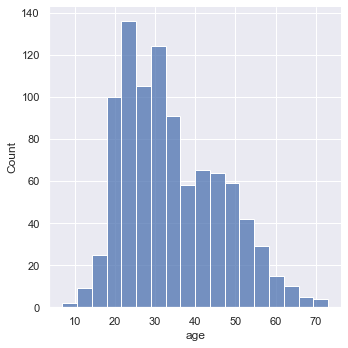

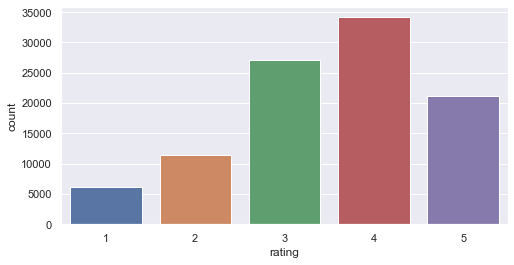

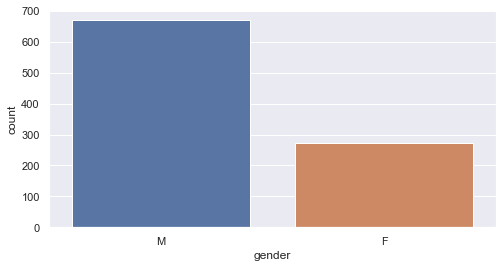

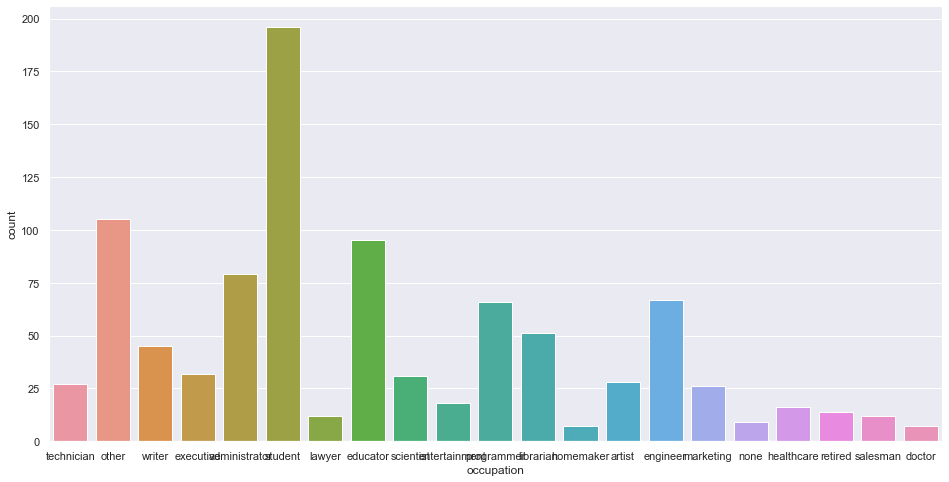

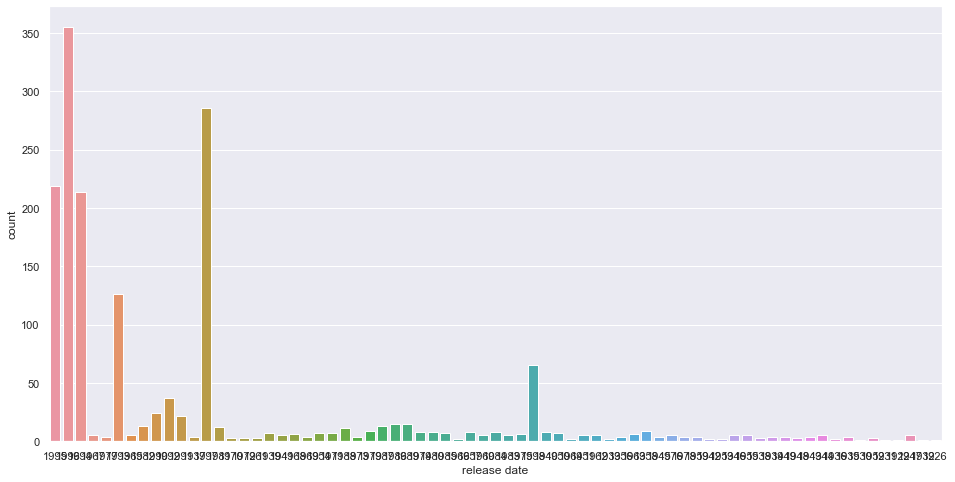

In [7]:
#your code here
ratings = pd.read_csv('data.csv')
users = pd.read_csv('user.csv')
users.set_index(['user id'], inplace=True)
ratings.set_index(['user id', 'movie id'], inplace=True)

sns.set(rc={"figure.figsize": (8, 4)})
sns.displot(users['age'],kde=False)
plt.show()

sns.countplot(x='rating', data=ratings)
plt.show()
print('Peole in the age group of 20-35 have highest ratings')


sns.countplot(x='gender', data=users)
plt.show()
print('More male are likely to rate a movie')


sns.set(rc={"figure.figsize": (16, 8)})
sns.countplot(x='occupation', data=users)
plt.show()

sns.set(rc={"figure.figsize": (16, 8)})
sns.countplot(x='release date', data=movies)
plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use item dataset to get count of movies released in a particular year, store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.

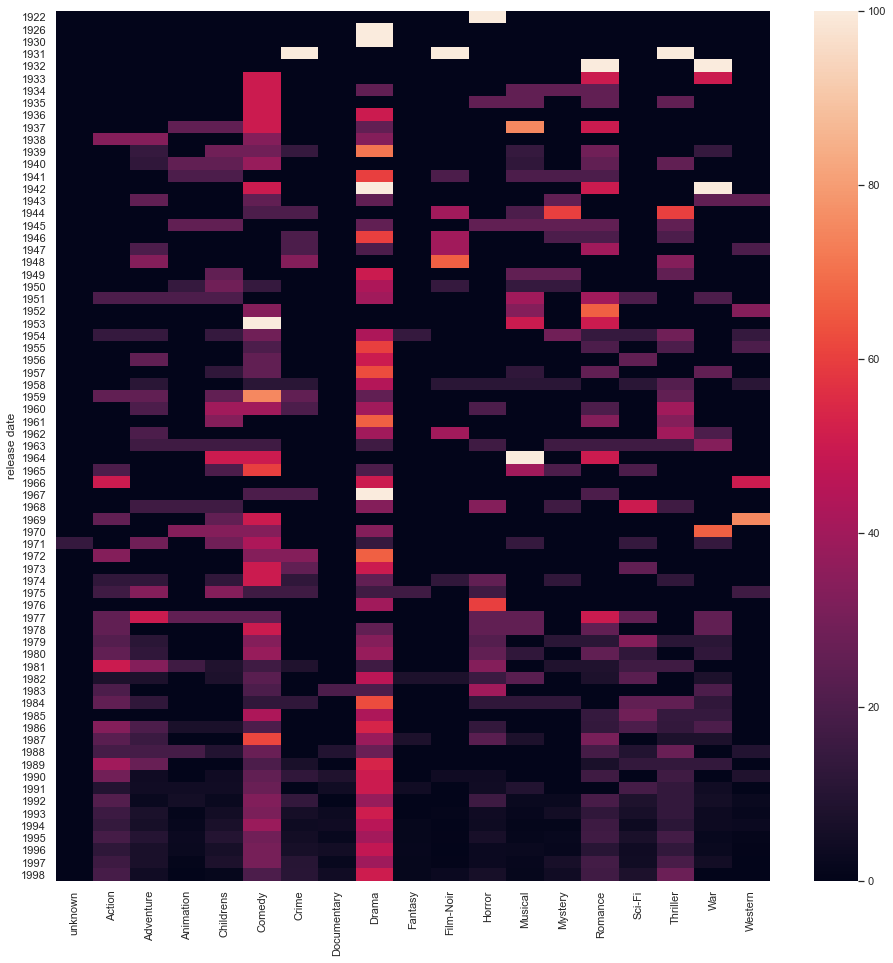

In [9]:
#your code here
pd.set_option("display.precision", 3)
movies = pd.read_csv('item.csv')
movies = movies.drop_duplicates()
movie_release_year = movies['release date'].apply(lambda x: x.split('-')[2])
movies.update(movie_release_year)
movies_genres = movies.drop(columns=['movie id', 'movie title'])
movies_genres.set_index(['release date'], inplace=True)

movies_per_genre_per_year = movies_genres.groupby('release date').sum()
movies_per_year = movies_genres.groupby('release date').count()


percent_data = movies_per_genre_per_year.div(movies_per_year) * 100
sns.set(rc={"figure.figsize": (16, 16)})
sns.heatmap(percent_data)
plt.show()

**Insights:**
- Drama can be condidered to be evergreen Genre for movies.
- More Action movies have been made after the 60's 

### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [10]:
#your code here
pd.set_option("display.precision", 3)
ratings = pd.read_csv('data.csv')
movies = pd.read_csv('item.csv')
ratings = ratings.drop(columns=['user id','timestamp'])
ratings.set_index(['movie id'], inplace=True)
movies.set_index(['movie id'], inplace=True)
keys = ['release date','unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
movies.drop(columns=keys, inplace=True)

sum_mat = ratings.groupby('movie id').sum()
count_mat = ratings.groupby('movie id').count()
more_than_100 = count_mat['rating'] > 100

sum_mat_more_100 = sum_mat[more_than_100]
count_mat_more_100 = count_mat[more_than_100]
movies_more_100 = movies[more_than_100]

average = sum_mat_more_100.div(count_mat_more_100)
sorted_average = average.sort_values(by=['rating'],ascending=False)

df_merge_col = pd.merge(sorted_average, movies_more_100, on='movie id')
top_25 = df_merge_col.head(25)
print("Top 25 movies with more than 100 ratings")
print(top_25)


Top 25 movies with more than 100 ratings
          rating                                        movie title
movie id                                                           
408        4.491                                    Close Shave, A 
318        4.466                                  Schindler's List 
169        4.466                               Wrong Trousers, The 
483        4.457                                        Casablanca 
64         4.445                         Shawshank Redemption, The 
603        4.388                                       Rear Window 
12         4.386                               Usual Suspects, The 
50         4.358                                         Star Wars 
178        4.344                                      12 Angry Men 
134        4.293                                      Citizen Kane 
427        4.292                             To Kill a Mockingbird 
357        4.292                   One Flew Over the Cuckoo's Nest 
98     

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


### 10. Check for the validity of the below statements with respect to the data provided - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

**Please pay attention to what should be the denominator while calculating percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [11]:
#your code here
ratings = pd.read_csv('data.csv')
movies = pd.read_csv('item.csv')
users = pd.read_csv('user.csv')

users.set_index('user id', inplace=True)
ratings.set_index('user id', inplace=True)
movies.set_index('movie id',inplace=True)


user_rating = pd.merge(users, ratings, on='user id')
user_rating_movie = user_rating.merge(movies, on='movie id',suffixes=('_left', '_right'))
male_rating = user_rating_movie['gender'] == 'M'
female_rating = user_rating_movie['gender'] == 'F'

male = user_rating_movie[male_rating]
female = user_rating_movie[female_rating]

total_movies_rated_by_male = male.shape[0]
total_movies_rated_by_female = female.shape[0]

user_rating_movie.set_index(['gender'], inplace=True)
user_rating_movie_clean = user_rating_movie.drop(columns=['age','occupation','zip code','timestamp','release date',
                                                          'movie id', 'rating', 'movie title'])


drama_counts = user_rating_movie_clean.groupby('gender')['Drama'].count()
drama_sums = user_rating_movie_clean.groupby('gender')['Drama'].sum()
drama_percent = drama_sums.div(drama_counts) * 100
print('Female per-cent for Drama %.2f' % drama_percent['F'])
print('Male per-cent for Drama %.2f' % drama_percent['M'])
print()


drama_counts = user_rating_movie_clean.groupby('gender')['Sci-Fi'].count()
drama_sums = user_rating_movie_clean.groupby('gender')['Sci-Fi'].sum()
drama_percent = drama_sums.div(drama_counts) * 100
print('Female per-cent for Sci-Fi %.2f' % drama_percent['F'])
print('Male per-cent for Sci-Fi %.2f' % drama_percent['M'])
print()

# Romance
drama_counts = user_rating_movie_clean.groupby('gender')['Romance'].count()
drama_sums = user_rating_movie_clean.groupby('gender')['Romance'].sum()
drama_percent = drama_sums.div(drama_counts) * 100
print('Female per-cent for Romance %.2f' % drama_percent['F'])
print('Male per-cent for Romance %.2f' % drama_percent['M'])



Female per-cent for Drama 42.77
Male per-cent for Drama 38.90

Female per-cent for Sci-Fi 10.21
Male per-cent for Sci-Fi 13.60

Female per-cent for Romance 22.76
Male per-cent for Romance 18.32


**Conclusion:**
* Men watch more drama than women
        Since the percentage of Drama movies watched by male(38.90) is less then that of the female(42.77) this statement is False
* Women watch more Sci-Fi than men
        Since the percentage of Drama movies watched by male(13.60) is greater then that of the female(10.21) this statement is False
* Men watch more Romance than women
        Since the percentage of Drama movies watched by male(18.32) is less then that of the female(22.76) this statement is False
